<a href="https://colab.research.google.com/github/rahil161190/Graduate-Admission-Predictor-Case-Study/blob/main/Graduate_Predictor_Business_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm

import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('Jamboree_Admission.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [ ]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


#Examine dataset structure, characteristics, and statistical summary.

In [ ]:
df.dtypes

,0
Serial No.,int64
GRE Score,int64
TOEFL Score,int64
University Rating,int64
SOP,float64
LOR,float64
CGPA,float64
Research,int64
Chance of Admit,float64


In [ ]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


# Data Preprocessing

##Identify missing values and imputation if required

In [ ]:
df.isna().sum(axis=0)

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


#Duplicate rows

In [ ]:
df[df.duplicated()].count()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


Insights

*   No duplicate rows.
*   No null values.


## Data info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
df.shape

(500, 9)

Insights

*   Dataset has 500 rows and 9 columns




In [ ]:
for i in df.columns:
  print(i)

Serial No.
GRE Score
TOEFL Score
University Rating
SOP
LOR 
CGPA
Research
Chance of Admit 


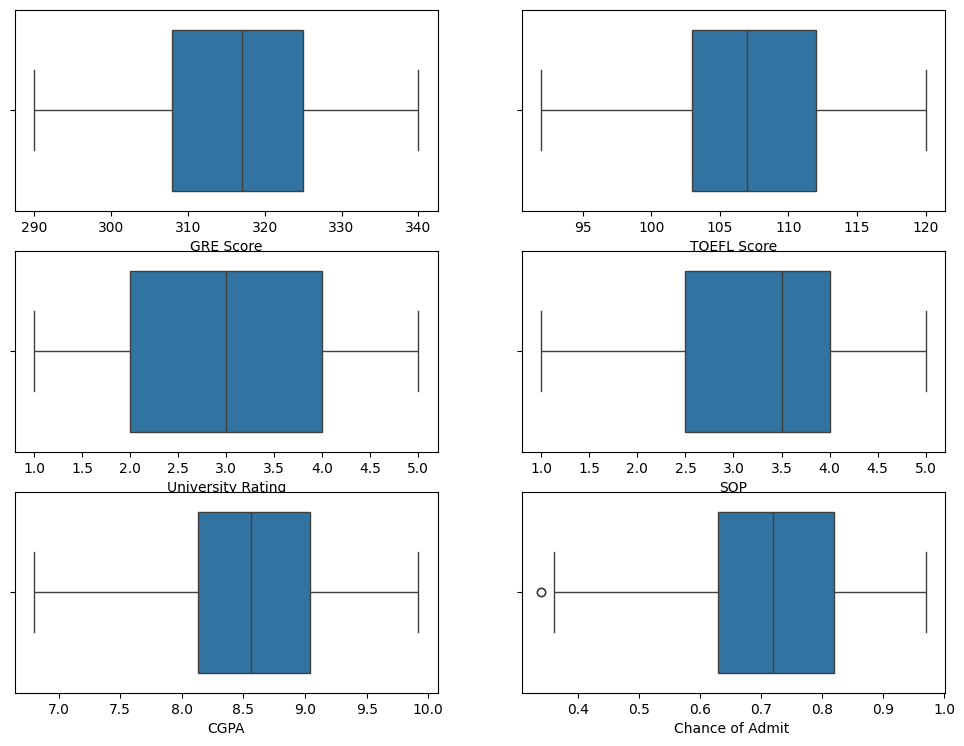

In [ ]:
plt.figure(figsize=(12, 12))

plt.subplot(4,2,1)
sns.boxplot(x=df['GRE Score'])

plt.subplot(4,2,2)
sns.boxplot(x=df['TOEFL Score'])

plt.subplot(4,2,3)
sns.boxplot(x=df['University Rating'])

plt.subplot(4,2,4)
sns.boxplot(x=df['SOP'])


plt.subplot(4,2,5)
sns.boxplot(x=df['CGPA'])


plt.subplot(4,2,6)
sns.boxplot(x=df['Chance of Admit '])


plt.show()

Insights

*   There are no outliers in all the feature columns.




## Treatment of outliers

Insights

*   There are no outliers so no treatment required



#  Skewnes values

In [ ]:
for i in df.columns:
  print(i,':',df[i].skew())

Serial No. : 0.0
GRE Score : -0.03984185809159066
TOEFL Score : 0.09560097235726285
University Rating : 0.09029498312712977
SOP : -0.22897239628779945
LOR  : -0.1452903146082398
CGPA : -0.026612517318359303
Research : -0.24247492100796933
Chance of Admit  : -0.289966210041158



# Kurtosis values

In [ ]:
for i in df.columns:
  print(i,':',df[i].kurtosis())

Serial No. : -1.2000000000000002
GRE Score : -0.7110644625938418
TOEFL Score : -0.6532454042173863
University Rating : -0.8100796635331018
SOP : -0.7057169536396795
LOR  : -0.7457485105986423
CGPA : -0.5612783980560527
Research : -1.9490180796876393
Chance of Admit  : -0.4546817998465431


Insights

*   skewnwess and kurtosis values are very low for all the attributes



# Univariate Analysis

## Histogram

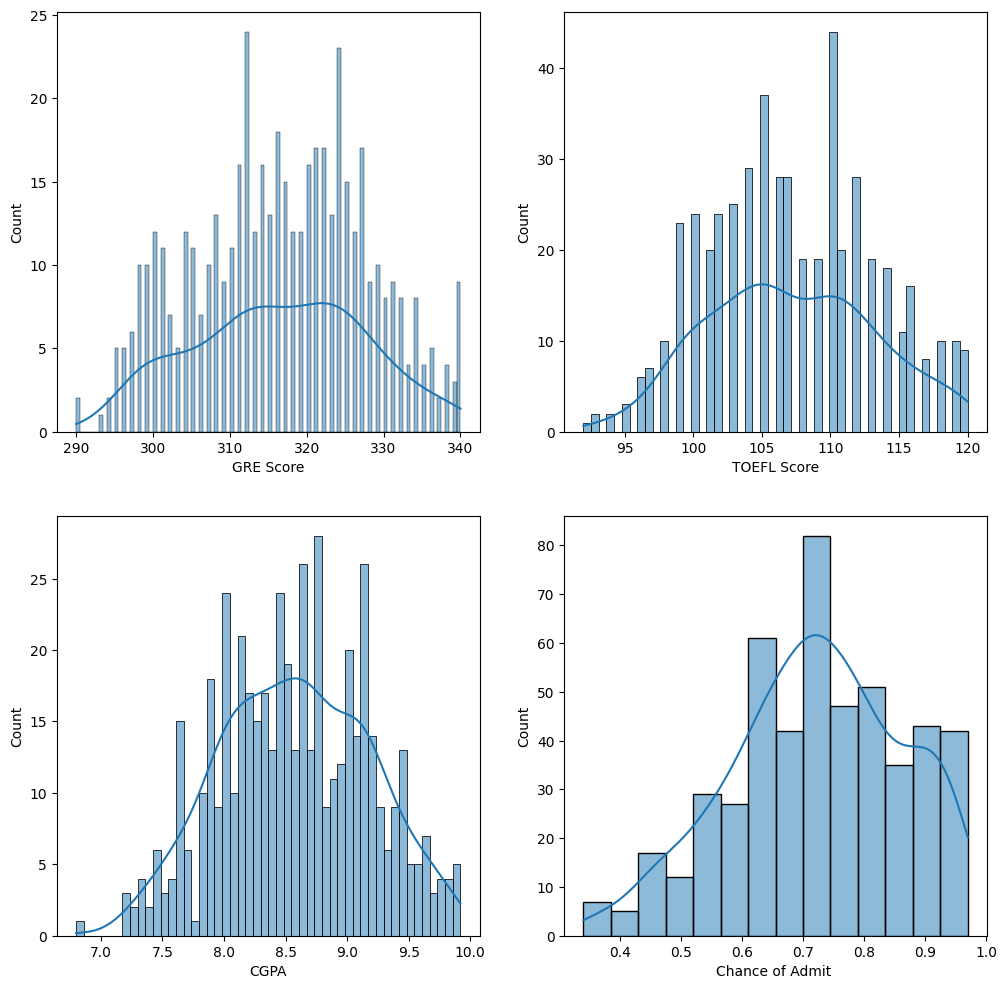

In [ ]:
plt.figure(figsize=(12, 12))

plt.subplot(2,2,1)
sns.histplot(df['GRE Score'],kde = True,bins =100)

plt.subplot(2,2,2)
sns.histplot(df['TOEFL Score'],kde = True,bins = 50)

plt.subplot(2,2,3)
sns.histplot(df['CGPA'],kde = True,bins =50)

plt.subplot(2,2,4)
sns.histplot(df['Chance of Admit '],kde = True)

plt.show()


Insights

*   GRE Score,CGPA,TOEFL score, chance of admit are uniformly distributed
*   Infact all the graphs seems to be uniformly distributed.










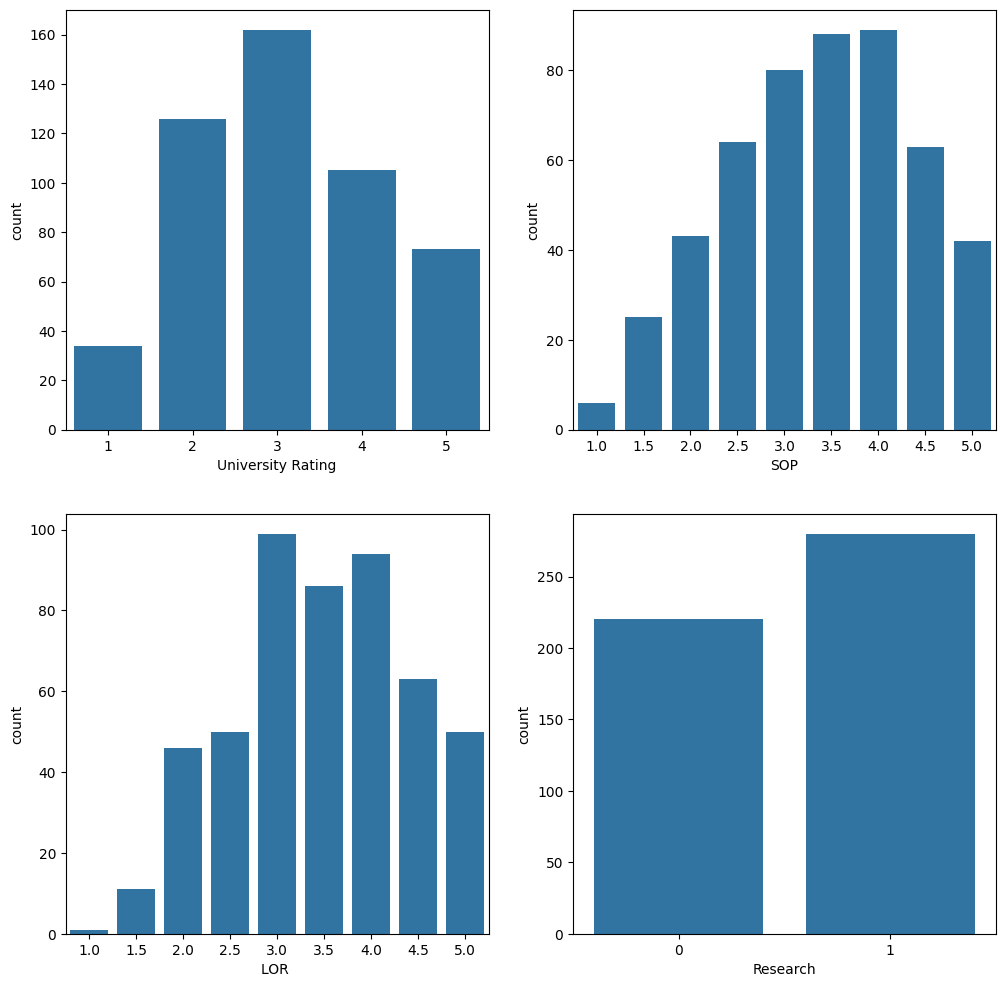

In [ ]:
plt.figure(figsize=(12, 12))

plt.subplot(2,2,1)
sns.countplot(x = 'University Rating',data =df )

plt.subplot(2,2,2)
sns.countplot(x = 'SOP',data = df)

plt.subplot(2,2,3)
sns.countplot(x = 'LOR ',data = df)

plt.subplot(2,2,4)
sns.countplot(x = 'Research',data =df)

plt.show()


Insights

*   Students with university rating of 3 are very high.
*   Students with LOR of 3 are and SOP of 3.5 and 4 very high.










# Relation between variables (Corelation)

In [ ]:
df[['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research','Chance of Admit ']].corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


<Axes: >

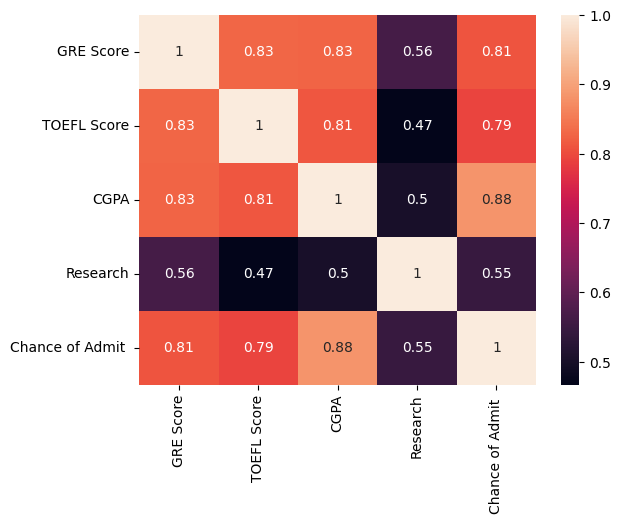

In [ ]:
sns.heatmap(df[['GRE Score','TOEFL Score','CGPA','Research','Chance of Admit ']].corr(),annot = True)

Insights

*   GRE Score and TOEFL Score are highly corelated with chance of admit.
*   GRE Score and CGPA are also highly corelated.
*   Chance of Admit and CGPA are also highly corelated.
*   'University Rating','SOP','LOR ' are not included in the heatmap because these are ordinal categorical feature columns and corelation wont give the correct results.
















# Bivariate Analysis

## Scatter plot or regplot

<Axes: xlabel='GRE Score', ylabel='CGPA'>

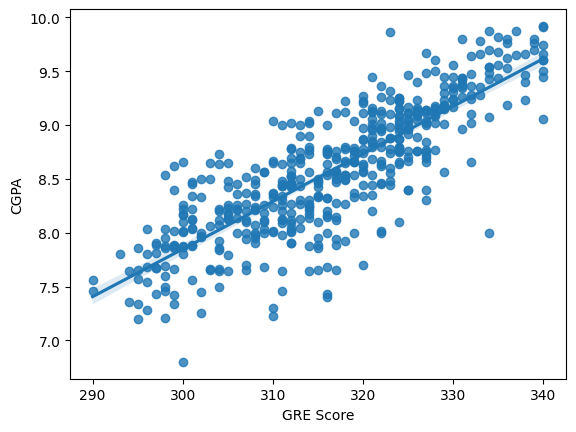

In [ ]:
sns.regplot(data = df,x=df['GRE Score'],y=df['CGPA'])


Insights

*   GRE Score and CGPA are postively corelated.
















<Axes: xlabel='GRE Score', ylabel='TOEFL Score'>

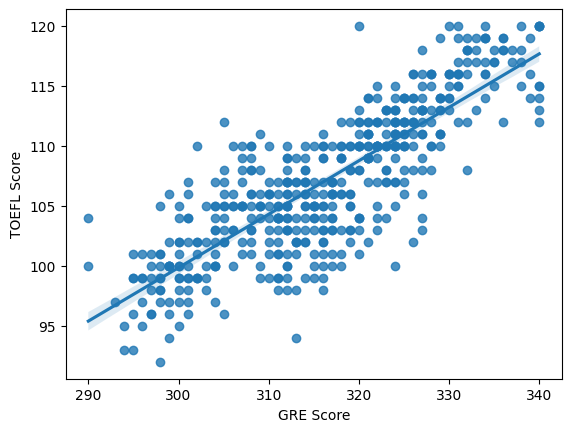

In [ ]:
sns.regplot(data = df,x=df['GRE Score'],y=df['TOEFL Score'])


Insights

*   GRE Score and TOEFL Score are postively corelated.
















<Axes: xlabel='GRE Score', ylabel='SOP'>

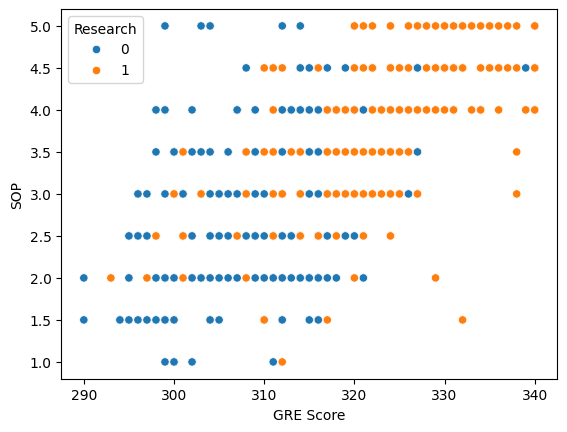

In [ ]:
sns.scatterplot(data = df,x=df['GRE Score'],y=df['SOP'], hue ='Research')

<Axes: xlabel='GRE Score', ylabel='LOR '>

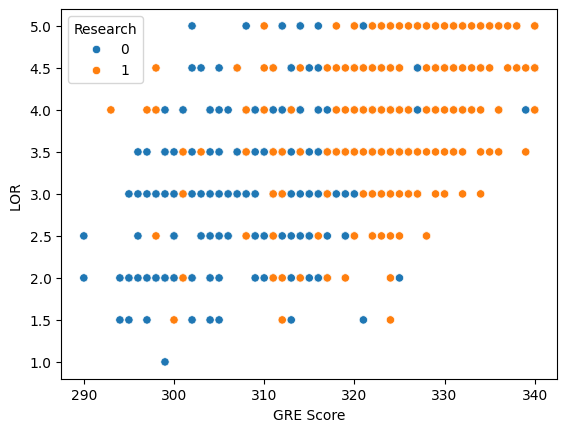

In [ ]:
sns.scatterplot(data = df,x=df['GRE Score'],y=df['LOR '], hue ='Research')

<Axes: xlabel='CGPA', ylabel='SOP'>

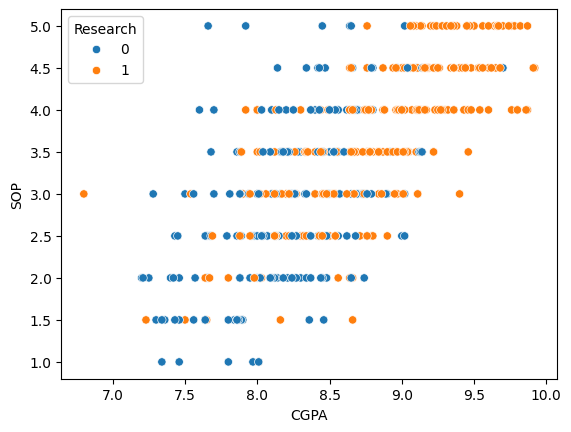

In [ ]:
sns.scatterplot(data = df,x=df['CGPA'],y=df['SOP'], hue ='Research')

<Axes: xlabel='CGPA', ylabel='LOR '>

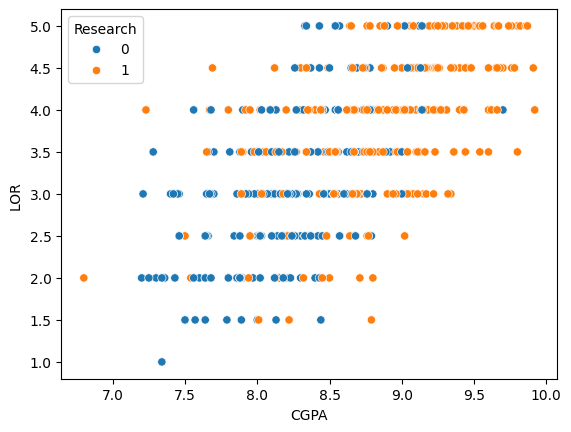

In [ ]:
sns.scatterplot(data = df,x=df['CGPA'],y=df['LOR '], hue ='Research')

Insights

*   In all the above graphs we can corelated that higher CGPA tends to have high LOR scale and SOP scale and same for GRE score also.
*   Students with high score in exams like GRE,TOEFL were given good rating of SOP,LOR because of there academic background.


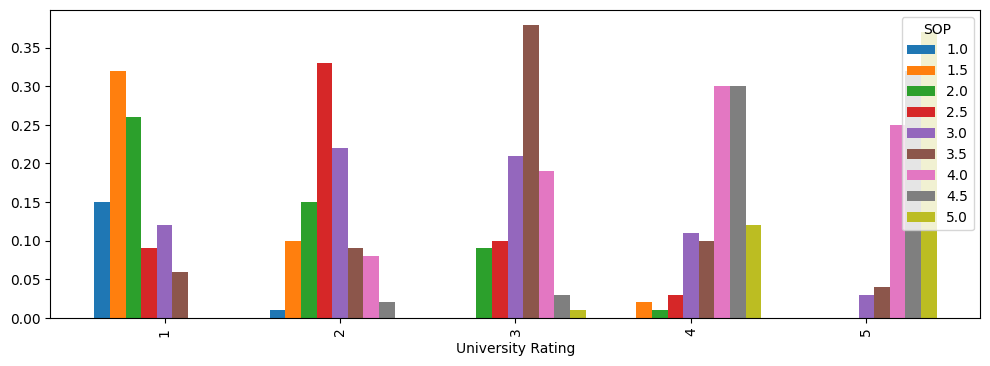

<Figure size 640x480 with 0 Axes>

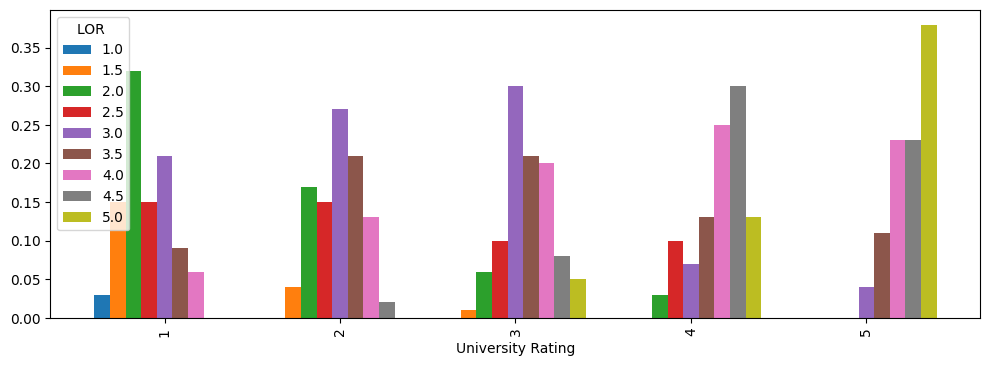

<Figure size 640x480 with 0 Axes>

In [ ]:

cat_col = ['SOP','LOR ']
for i in cat_col:
  plt.figure(figsize =(12,4))
  np.round(pd.crosstab(index = df['University Rating'],columns = df[i],normalize = 'index'),2).plot(kind = 'bar', width=0.8, ax=plt.gca())
  plt.show()
  plt.tight_layout()


Insights

*   We can see that university rating is directly proportional to LOR rating.
*   We can see that university rating is directly proportional SOP rating.


















## Prepare Data for modeling

In [ ]:
df_model =  df.drop(['Serial No.'],axis =1)

Insights

*   We are dropping serial number because it is redundant and of no use while making model.

















In [ ]:
df_model

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


# ML model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score,root_mean_squared_error

In [ ]:
x = df_model.drop('Chance of Admit ',axis =1)
y = df_model['Chance of Admit ']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 7), (100, 7), (400,), (100,))

## Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
X_train_columns = X_train.columns
std = StandardScaler()
X_train_std = std.fit_transform(X_train)


In [ ]:
X_train_std

array([[ 0.38998634,  0.6024183 , -0.09829757, ...,  0.56498381,
         0.4150183 ,  0.89543386],
       [-0.06640493,  0.6024183 ,  0.7754586 , ...,  1.65149114,
        -0.06785154, -1.11677706],
       [-1.25302222, -0.87691722, -0.09829757, ..., -0.52152352,
        -0.13445427, -1.11677706],
       ...,
       [-1.34430047, -1.37002906, -1.8458099 , ..., -1.60803084,
        -2.2157898 , -1.11677706],
       [-0.7053527 , -0.38380538, -0.97205374, ...,  0.56498381,
        -1.49981038, -1.11677706],
       [-0.24896144, -0.21943477, -0.97205374, ...,  0.02173015,
        -0.55072138, -1.11677706]])

In [ ]:
x_train = pd.DataFrame(X_train_std,columns = X_train_columns)

In [ ]:
y_train

,Chance of Admit
249,0.77
433,0.71
19,0.62
322,0.72
332,0.75
...,...
106,0.87
270,0.72
348,0.57
435,0.55


In [ ]:
X_test_std = std.transform(X_test)
X_test_std = pd.DataFrame(X_test_std, columns=X_test.columns)

In [ ]:
X_test_std

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.576604,1.424271,0.775459,0.633979,0.021730,1.597217,0.895434
1,-0.248961,0.109306,0.775459,1.141162,0.564984,0.764683,0.895434
2,-0.157683,-0.383805,-0.972054,-1.394754,-1.064777,-1.549762,-1.116777
3,-0.431518,0.273677,-0.098298,-0.380387,-0.521524,0.181909,-1.116777
4,0.846378,0.766789,-0.098298,0.126796,-0.521524,0.781333,0.895434
...,...,...,...,...,...,...,...
95,-1.618135,-2.191882,-1.845810,-2.409120,-2.694538,-2.065934,-1.116777
96,-0.157683,-0.219435,-0.098298,1.141162,0.021730,-0.267660,-1.116777
97,1.120212,1.095530,-0.972054,-1.394754,0.564984,-0.034550,0.895434
98,0.116152,0.438048,-1.845810,-0.887570,0.021730,-0.067852,0.895434


In [ ]:
models = [['Linear Regression:', LinearRegression()],
          ['Lasso Regression:' , Lasso(alpha=.1)],
          ['Ridge Regression:', Ridge(alpha =.1)]]

for name,model in models:
  model.fit(x_train,y_train)
  predictions = model.predict(X_test_std)
  print(name,'MSE:',mean_squared_error(y_test,predictions))
  print(name,'RMSE:',root_mean_squared_error(y_test,predictions))
  print(name,'R2:',r2_score(y_test,predictions))
  print(name,'Coefficient:', model.coef_)
  print(name,'intercept:', model.intercept_)

Linear Regression: MSE: 0.0037046553987884136
Linear Regression: RMSE: 0.06086588041578314
Linear Regression: R2: 0.8188432567829627
Linear Regression: Coefficient: [0.02667052 0.01822633 0.00293995 0.001788   0.0158655  0.06758106
 0.01194049]
Linear Regression: intercept: 0.7241749999999999
Lasso Regression: MSE: 0.014988926561014373
Lasso Regression: RMSE: 0.12242927166741772
Lasso Regression: R2: 0.2670451559406176
Lasso Regression: Coefficient: [0.         0.         0.         0.         0.         0.02327562
 0.        ]
Lasso Regression: intercept: 0.7241749999999999
Ridge Regression: MSE: 0.003704766717384003
Ridge Regression: RMSE: 0.06086679486702091
Ridge Regression: R2: 0.8188378133308556
Ridge Regression: Coefficient: [0.02668271 0.01823934 0.0029506  0.00180304 0.01586828 0.06752337
 0.01194136]
Ridge Regression: intercept: 0.7241749999999999


Insights:-

**Performance Overview**
*   Linear and Ridge Regression models have nearly identical performance, with high R_score (0.818) and very low RMSE (0.061), indicating strong predictive accuracy on the test set.

*  Lasso Regression performs significantly worse, with R_score = 0.267 and RMSE ≈ 0.122, suggesting heavy underfitting at the current α value (0.1).

**Coefficient Behavior**
*  Linear Regression uses all features and assigns reasonable weights to each.

*  Ridge Regression retains all features with slightly adjusted (shrunk) coefficients to reduce overfitting.

*  Lasso Regression zeroes out all but one feature (likely CGPA), resulting in poor performance—suggesting that α = 0.1 is too strong for this dataset.

**Interpretability & Regularization Effect**

*  Lasso's decided only one variable (most likely CGPA) contributes to the prediction—and treated all others (GRE, TOEFL, SOP, etc.) as noise. But you know from your earlier heatmap and R² values that features like GRE Score and TOEFL are strongly correlated with admission chances.So by zeroing them out Lasso oversimplified the model and ignored the useful predictors and resulted in low R_score= .26 which is underfitted.

*  Ridge provides a smooth regularization effect, making it a better fit in scenarios with mild multicollinearity and no need for feature elimination.

In [ ]:
#we can tune alpha for lasso to a lower value and it will significantly reducess the strength of regularization

In [ ]:
models = [['Linear Regression:', LinearRegression()],
          ['Lasso Regression:' , Lasso(alpha=.01)],
          ['Ridge Regression:', Ridge(alpha =.1)]]

for model_name,model in models:
  model.fit(x_train,y_train)
  predictions = model.predict(X_test_std)
  print(model_name,'MSE:',mean_squared_error(y_test,predictions))
  print(model_name,'RMSE:',root_mean_squared_error(y_test,predictions))
  print(model_name,'R2:',r2_score(y_test,predictions))
  print(model_name,'Coefficient:', model.coef_)
  print(model_name,'intercept:', model.intercept_)

Linear Regression: MSE: 0.0037046553987884136
Linear Regression: RMSE: 0.06086588041578314
Linear Regression: R2: 0.8188432567829627
Linear Regression: Coefficient: [0.02667052 0.01822633 0.00293995 0.001788   0.0158655  0.06758106
 0.01194049]
Linear Regression: intercept: 0.7241749999999999
Lasso Regression: MSE: 0.0038037941002089094
Lasso Regression: RMSE: 0.06167490656830304
Lasso Regression: R2: 0.8139953985227918
Lasso Regression: Coefficient: [0.02624005 0.01513663 0.00091904 0.         0.01111117 0.06895746
 0.00609861]
Lasso Regression: intercept: 0.7241749999999999
Ridge Regression: MSE: 0.003704766717384003
Ridge Regression: RMSE: 0.06086679486702091
Ridge Regression: R2: 0.8188378133308556
Ridge Regression: Coefficient: [0.02668271 0.01823934 0.0029506  0.00180304 0.01586828 0.06752337
 0.01194136]
Ridge Regression: intercept: 0.7241749999999999


Insights

*   Now the lasso model R_score is same as linear and we reduce underfitting  and also also some weightage to features are given.

















## Linear Regression using Statsmodel library (Ordinary Least Squares OLS)

In [ ]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.389986,0.602418,-0.098298,0.126796,0.564984,0.415018,0.895434
1,-0.066405,0.602418,0.775459,0.633979,1.651491,-0.067852,-1.116777
2,-1.253022,-0.876917,-0.098298,0.126796,-0.521524,-0.134454,-1.116777
3,-0.248961,-0.055064,-0.972054,-0.887570,0.564984,-0.517420,-1.116777
4,-0.796631,-0.219435,-0.098298,0.126796,-1.064777,-0.617324,0.895434
...,...,...,...,...,...,...,...
395,1.120212,0.602418,0.775459,1.141162,1.108237,0.997792,0.895434
396,-0.979187,-0.383805,-0.972054,-0.887570,-0.521524,-0.600673,0.895434
397,-1.344300,-1.370029,-1.845810,-1.394754,-1.608031,-2.215790,-1.116777
398,-0.705353,-0.383805,-0.972054,-0.887570,0.564984,-1.499810,-1.116777


In [ ]:
import statsmodels.api as sm
x_train_stats  = sm.add_constant(x_train)
model_stats = sm.OLS(y_train.values,x_train_stats).fit()
model_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.0
Date:                Sat, 14 Jun 2025   Prob (F-statistic):          3.41e-142
Time:                        08:47:47   Log-Likelihood:                 561.91
No. Observations:                 400   AIC:                            -1108.
Df Residuals:                     392   BIC:                            -1076.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7242      0.003    241.441      0.000       0.718       0.730
GRE Score             0.0267      0.006      4.196      0.000       0.014       0.039
TOEFL Score           0.0182      0.006      3.174      0.002       0.007       0.030
University Rating     0.0029      0.005      0.611      0.541      -0.007       0.012
SOP                   0.0018      0.005      0.357      0.721      -0.008       0.012
LOR                   0.0159      0.004      3.761      0.000       0.008       0.024
CGPA                  0.0676      0.006     10.444      0.000       0.055       0.080
Research              0.0119      0.004      3.231      0.001       0.005       0.019
==============================================================================
Omnibus:                       86.232   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.099
Skew:                          -1.107   Prob(JB):                     5.25e-42
Kurtosis:                       5.551   Cond. No.                         5.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Insights

*   R_score .821 is almost same as linear regression,ridge regression model.
*   Adjusted R_score = .818 means adding predictors is contributing meaningfully and there is no redundant feature impacting our target variable, if this adjusted R_score was lower than R_score then we could have said some redundant unnecesaary feature is impacting our prediction variable.


*   P values of University rating and SOP are higher than .05 that means these features are not significant holding any importance in predicting the target values(chance of admit).

*   P values of other features are pretty significant and less than .05 so they are strong predictor.


# Variance Inflation Factor (Assumptions Test)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = pd.DataFrame()

X_t = pd.DataFrame(x_train, columns=x_train.columns)
vif['Features']  =X_t.columns
vif

,Features
0,GRE Score
1,TOEFL Score
2,University Rating
3,SOP
4,LOR
5,CGPA
6,Research


In [ ]:

vif['values'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]

vif['values'] = vif['values'].round(2)
vif = vif.sort_values(by='values', ascending=False)
vif

,Features,values
5,CGPA,4.65
0,GRE Score,4.49
1,TOEFL Score,3.66
3,SOP,2.79
2,University Rating,2.57
4,LOR,1.98
6,Research,1.52


Insights

*   Vif values are less than 5 that means there is no multicollinearity if the values were higher than 5 then we would have remove that features.


#  Model -2 Re-train (Dropping insignificant features)

We can drop SOP and University Rating because in stat model p-value of these were high depicting not significant features in predicting target variable and re run the model to see the score and other importable values.


In [ ]:

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 7), (100, 7), (400,), (100,))

In [ ]:
X_train_2 = X_train.drop(['University Rating','SOP'],axis =1)
X_test_2 = X_test.drop(['University Rating','SOP'],axis =1)

In [ ]:
X_train_2_columns = X_train_2.columns
std = StandardScaler()
X_train_2_std = std.fit_transform(X_train_2)

In [ ]:
X_train_2 = pd.DataFrame(X_train_2_std,columns = X_train_2_columns)
X_train_2

,GRE Score,TOEFL Score,LOR,CGPA,Research
0,0.389986,0.602418,0.564984,0.415018,0.895434
1,-0.066405,0.602418,1.651491,-0.067852,-1.116777
2,-1.253022,-0.876917,-0.521524,-0.134454,-1.116777
3,-0.248961,-0.055064,0.564984,-0.517420,-1.116777
4,-0.796631,-0.219435,-1.064777,-0.617324,0.895434
...,...,...,...,...,...
395,1.120212,0.602418,1.108237,0.997792,0.895434
396,-0.979187,-0.383805,-0.521524,-0.600673,0.895434
397,-1.344300,-1.370029,-1.608031,-2.215790,-1.116777
398,-0.705353,-0.383805,0.564984,-1.499810,-1.116777


In [ ]:
X_test_std_2 = std.transform(X_test_2)
X_test_std_2= pd.DataFrame(X_test_std_2, columns=X_test_2.columns)

## Linear Regression,Lasso Regression ,Ridge Regression model

In [ ]:
model = [['Linear Regression_model2:', LinearRegression()],
          ['Lasso Regression_model2:' , Lasso(alpha=.1)],
          ['Ridge Regression_model2:', Ridge(alpha =.1)]]

for name,model in models:
  model.fit(X_train_2,y_train)
  predictions = model.predict(X_test_std_2)
  print(name,'MSE:',mean_squared_error(y_test,predictions))
  print(name,'RMSE:',root_mean_squared_error(y_test,predictions))
  print(name,'R2:',r2_score(y_test,predictions))
  print(name,'Coefficient:', model.coef_)
  print(name,'intercept:', model.intercept_)

Linear Regression: MSE: 0.003773020765116889
Linear Regression: RMSE: 0.06142491974041878
Linear Regression: R2: 0.8155002070847488
Linear Regression: Coefficient: [0.02687911 0.01910598 0.01720703 0.06906616 0.012226  ]
Linear Regression: intercept: 0.7241749999999999
Lasso Regression: MSE: 0.0038203247528045357
Lasso Regression: RMSE: 0.06180877569410784
Lasso Regression: R2: 0.81318705365259
Lasso Regression: Coefficient: [0.02632116 0.01530164 0.01134455 0.06922436 0.00616662]
Lasso Regression: intercept: 0.7241749999999999
Ridge Regression: MSE: 0.003773421903165849
Ridge Regression: RMSE: 0.06142818492488484
Ridge Regression: R2: 0.8154805915322324
Ridge Regression: Coefficient: [0.02689283 0.01912363 0.01721737 0.06901596 0.01222817]
Ridge Regression: intercept: 0.7241749999999999


## Linear Regression using Statsmodel (Ordinary Least Squares)

In [ ]:
x_train_2_stats  = sm.add_constant(X_train_2)
model_2_stats = sm.OLS(y_train.values,x_train_2_stats ).fit()
model_2_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     360.8
Date:                Sat, 14 Jun 2025   Prob (F-statistic):          1.36e-144
Time:                        10:59:07   Log-Likelihood:                 561.54
No. Observations:                 400   AIC:                            -1111.
Df Residuals:                     394   BIC:                            -1087.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7242      0.003    241.830      0.000       0.718       0.730
GRE Score       0.0269      0.006      4.245      0.000       0.014       0.039
TOEFL Score     0.0191      0.006      3.391      0.001       0.008       0.030
LOR             0.0172      0.004      4.465      0.000       0.010       0.025
CGPA            0.0691      0.006     11.147      0.000       0.057       0.081
Research        0.0122      0.004      3.328      0.001       0.005       0.019
==============================================================================
Omnibus:                       84.831   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.096
Skew:                          -1.094   Prob(JB):                     6.41e-41
Kurtosis:                       5.514   Cond. No.                         4.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Insights:
* Removing non-significant features (SOP and University Rating) had minimal impact on performance.
* Model is now simpler and cleaner, with fewer predictors but almost identical predictive power.
* Lasso no longer underfits — the remaining features are strong enough on their own.

# Assumptions Test

In [ ]:
#Prediction from the latest model_2
model_2 =  LinearRegression().fit(X_train_2,y_train)

In [ ]:
model_2

LinearRegression()

In [ ]:
y_hat = model_2.predict(X_test_std_2)

In [ ]:
y_hat.shape

(100,)

In [ ]:
errors = y_test - y_hat

## Residual Distribution

Text(0.5, 1.0, 'Residual Distribution')

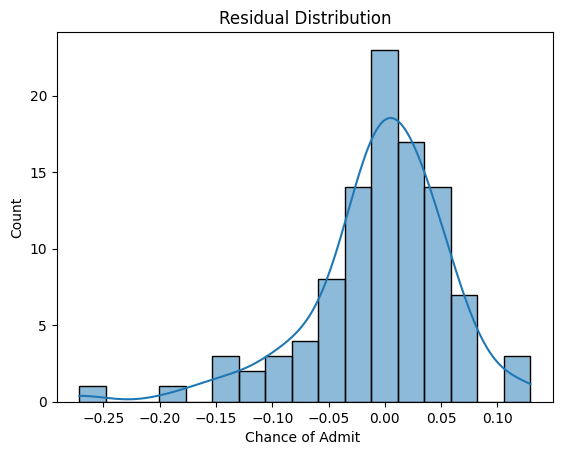

In [ ]:
sns.histplot(errors,kde = True)
plt.title("Residual Distribution")

Insights:
* Residual distribution is following normal distribution which is OK.

In [ ]:
errors

,Chance of Admit
361,0.014600
73,0.046945
374,-0.183592
155,0.062259
104,-0.077513
...,...
347,-0.016098
86,0.036022
75,-0.073500
438,-0.072302


## Mean of Residuals

In [ ]:
mean_residuals = np.mean(errors)
mean_residuals

np.float64(-0.005305947942348634)

Insights:
* Meam of resiual is 0 that means it satisfy OLS Ordinary Least Squares assumptions and there no overall bias.

## Test for Homoscedasticity

Text(0.5, 1.0, 'Graph for homoscedasticity check')

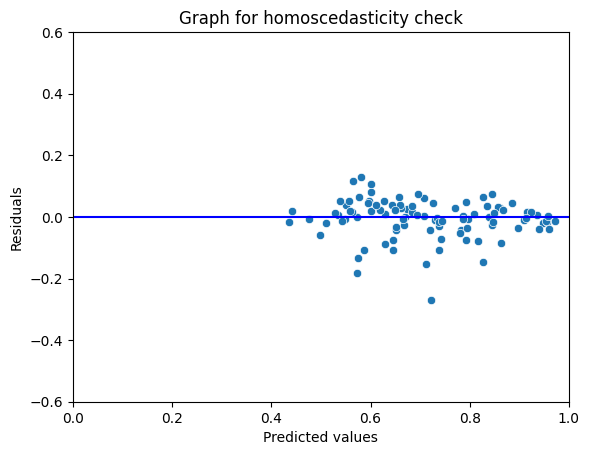

In [ ]:
sns.scatterplot(x = y_hat, y = errors)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.ylim(-0.6,0.6)
p = sns.lineplot(x=[0,5], y=[0,0], color='blue')
plt.xlim(0,1)
plt.title("Graph for homoscedasticity check")

Insights:
* Graph clearly shows the variance of predictions against residuals are not changing that means there is no Heteroscadasticity.

Text(0.5, 0.98, 'y_hat vs y_test')

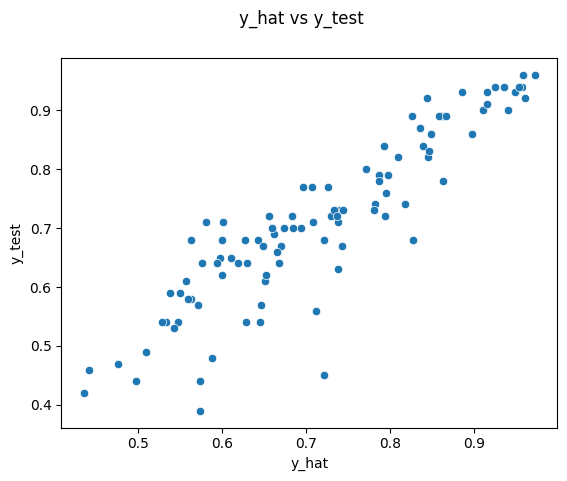

In [ ]:
fig = plt.figure()
sns.scatterplot(x = y_hat, y = y_test)
plt.ylabel('y_test')                          # X-label
plt.xlabel('y_hat')
fig.suptitle('y_hat vs y_test')

# Provide Actionable Insights & Recommendations.
**Actionable Insights and recommendations** :


*   There are no outliers and duplicates in the data.
*   GRE Score ,TOEFL Score and CGPA are higly corelated with Chance of admit.
*   GRE Score,TOEFL score and CGPA are fairly distributed.
*   Since the target variable is numeric continous linear regression model is applied.
*   Train,test of 80 % to 20% is executed.
*   Standard Scaler for normalisation is required before modelling beccause range of feature columns like GRE,TOEFL,CGPA are highly diverse.
* Model 1 and 2 consist of linear regression baseline model, lasso regression,ridge regression model and OLS (Stats model).
*  After tuning alpha value to much lower for model 1(lasso) R_score arrives same as linear and we reduce underfitting and also also some weightage to features are given.
*  All the assumptions of Linear regression model holds true i.e distribution of residual is normal,No heteroscadasticity,No multicollinearity,mean of residual is 0.

**Model 1(Linear Regression,Lasso,Ridge) Insights** :-   

**Performance Overview**
*   Linear and Ridge Regression models have nearly identical performance, with high R_score (0.818) and very low RMSE (0.061), indicating strong predictive accuracy on the test set.

*  Lasso Regression performs significantly worse, with R_score = 0.267 and RMSE ≈ 0.122, suggesting heavy underfitting at the current α value (0.1).

**Coefficient Behavior**
*  Linear Regression uses all features and assigns reasonable weights to each.

*  Ridge Regression retains all features with slightly adjusted (shrunk) coefficients to reduce overfitting.

*  Lasso Regression zeroes out all but one feature (likely CGPA), resulting in poor performance—suggesting that α = 0.1 is too strong for this dataset.

**Interpretability & Regularization Effect**

*  Lasso's decided only one variable (most likely CGPA) contributes to the prediction—and treated all others (GRE, TOEFL, SOP, etc.) as noise. But you know from your earlier heatmap and R² values that features like GRE Score and TOEFL are strongly correlated with admission chances.So by zeroing them out Lasso oversimplified the model and ignored the useful predictors and resulted in low R_score= .26 which is underfitted.

*  Ridge provides a smooth regularization effect, making it a better fit in scenarios with mild multicollinearity and no need for feature elimination.

**Model 1(OLS) Insights** :-

*   R_score .821 is almost same as linear regression,ridge regression model.
*   Adjusted R_score = .818 means adding predictors is contributing meaningfully and there is no redundant feature impacting our target variable, if this adjusted R_score was lower than R_score then we could have said some redundant unnecesaary feature is impacting our prediction variable.


*   P values of University rating and SOP are higher than .05 that means these features are not significant holding any importance in predicting the target values(chance of admit).

*   P values of other features are pretty significant and less than .05 so they are strong predictor.

**Model 2(Linear Regression,Lasso,Ridge,OLS) Insights**:
* In model 2 features like SOP and Univeristy rating because in model 1 OLS results showed these features are insignificant in predicting target columns and hence are removed and retrained to check the performance.
* Removing non-significant features (SOP and University Rating) had minimal impact on performance.
* Model is now simpler and cleaner, with fewer predictors but almost identical predictive power and R_score,adjusted_R_score,RMSE,MSE,coefficient is almost same as model 1.
* Lasso no longer underfits — the remaining features are strong enough on their own.

